In [1]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import joblib

In [2]:
args = {
    "dataset_t": "confidential/train150.txt",
    "dataset_p": "confidential/prev150.txt",
    "model": "out/wind_speed_nn.model",
    "norm": "out/wind_speed_norm",
    "plot": "out/wind_speed_predict_1h_plot.png"
}

In [3]:
# load train datas
dataframe_t = pd.read_csv(args["dataset_t"], delimiter="\t", header=None)
dataset_t = dataframe_t.values

In [4]:
# load pred datas
dataframe_p = pd.read_csv(args["dataset_p"], delimiter="\t", header=None)
dataset_p = dataframe_p.values

In [5]:
# preprocessing for input in rna
X_prev = np.copy(dataset_p)
X_prev[:, 4] = np.concatenate([dataset_t[-1:, 4], dataset_p[:-1, 4]])

In [6]:
# importing scaler normalization
scaler_x = joblib.load("{}_x.joblib".format(args["norm"]))
scaler_y = joblib.load("{}_y.joblib".format(args["norm"]))

In [7]:
# datas normalization
X_prev = scaler_x.transform(X_prev)
print(X_prev)

[[0.75862069 1.         0.         ... 0.09269569 0.79150006 0.89905456]
 [0.75862069 1.         0.         ... 0.25666254 0.49285959 0.89844404]
 [0.75862069 1.         0.         ... 0.20092143 0.59968011 0.89021072]
 ...
 [1.03448276 1.         0.         ... 0.28765643 0.84715271 0.92415962]
 [1.03448276 1.         0.         ... 0.27407164 0.80763738 0.91915334]
 [1.03448276 1.         0.         ... 0.34080128 0.77390609 0.91486224]]


In [8]:
# load trained model and predict
model = tf.keras.models.load_model(args["model"])
preds = model.predict(X_prev)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.


In [9]:
# inverse normalization
Y_pred = scaler_y.inverse_transform(preds)

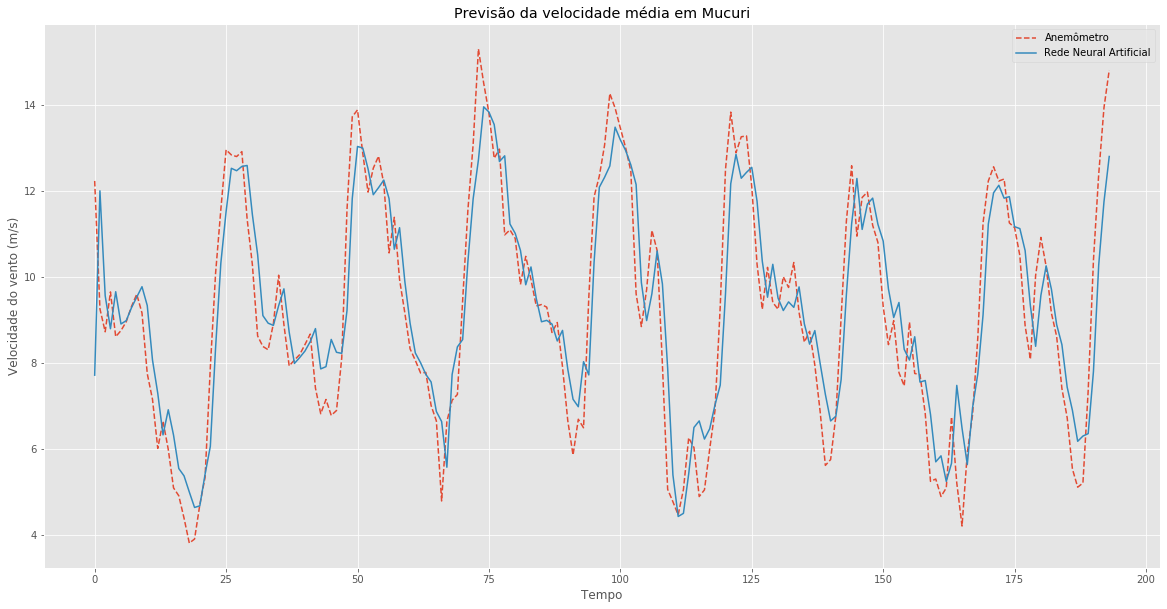

In [10]:
# plot prediction
y_size = range(len(dataset_p))
Y_real = dataset_p[:,4]

plt.figure(figsize=(20,10))
plt.style.use("ggplot")
plt.plot(y_size, Y_real, linestyle="--", label="Anemômetro")
plt.plot(y_size, Y_pred, label="Rede Neural Artificial")
plt.title("Previsão da velocidade média em Mucuri")
plt.xlabel("Tempo")
plt.ylabel("Velocidade do vento (m/s)")
plt.legend()
plt.savefig(args["plot"])